<header>
    <center>    
        <h1>Math 104B Homework 6</h1>
        <h2>Rad Mallari, 8360828</h2>
        <h2>May 22nd, 2022</h2>
    </center>
</header>

<b>1.) (a)</b> Implement the tridiagonal solver seen in class

In [1]:
from math import pi, sin, sqrt
from matplotlib import pyplot as plt
def tridiagonal_matrix_solver(a, b, c, d):
    n = len(a)
    # Initialize variables
    m, l, y, x = [], [], [], [0 for i in range(n)]

    m.append(a[0])
    for j in range(n-1):
        l.append(c[j] / m[j])
        m.append(a[j+1] - l[j] * b[j])
 
    # Forward substitution
    y.append(d[0])
    for j in range(1, n):
        y.append(d[j] - l[j - 1] * y[j - 1])

    # Backward substitution
    x[-1] = y[-1] / m[-1]
    for j in reversed(range(n-1)):
        x[j] = (y[j] - b[j] * x[j + 1]) / m[j]
    return x

&emsp;&emsp;<b>(b)</b> Test implementation

In [2]:
b_n = [-1,-1,-1,-1]
a_n = [3,3,3,3,3]
c_n = [-1,-1,-1,-1]
d_n = [2,1,1,1,2]
result = tridiagonal_matrix_solver(a_n, b_n, c_n, d_n)
print(result)

[1.0, 1.0, 1.0, 1.0, 1.0]


<b>2.)</b> Consider the boundary value problem:
$$\begin{equation}
\begin{split}
-u''+\pi^{2}u&=2\pi^{2}\sin(\pi x)\quad 0<x<1,\\
u(0)&=u(1)=0
\end{split}
\end{equation}$$
&emsp;&emsp; We can find a numerical approximation to the solution of this problem by employing the finite difference method.<br>
&emsp;&emsp; Use a uniform grid with $N-1$ interior nodes to obtain, by replacing the second order derivative with a second order finite difference<br>
&emsp;&emsp; and neglecting the (truncation) error, the linear system
$$\begin{equation}
\frac{-v_{j-1}+2v_{j}-v_{j+1}}{h^{2}}+\pi^{2}v_{j}=2\pi^{2}\sin(\pi x_{j})\quad\text{for }j=1,2,...,N-1
\end{equation}$$
&emsp;&emsp; where $h=\frac{1}{N}$, $v_{j}$ is the approximation to $u(x_{j})$ for $j=1,2,...,N-1$, and $v_{0}=v_{N}=0$.<br>
&emsp;&emsp;<b>(a)</b> Use your tridiagonal solver to solve the equation <b>(1)</b> for $N=50$ and plot your corresponding solution.<br>

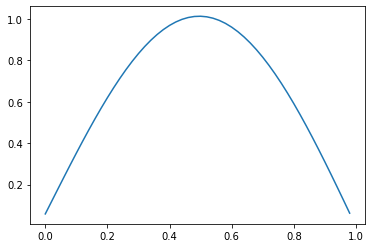

In [3]:
N = 50
h = 1/N

x_n = [x*h for x in range(N)]
a_j, b_j, c_j, f_j = [], [], [], []

for i in range(N-1):
    a_j.append(-1)
    c_j.append(-1)
for i in range(N):
    b_j.append(2+h**2*pi**2)

f_j.append(0)
for i in range(1, N-1):
    two_pi_squared = 2*(pi**2)*h**2
    f_j.append(two_pi_squared*sin(pi*x_n[i]))
f_j.append(0)

v_j = tridiagonal_matrix_solver(b_j, a_j, c_j, f_j)

plt.plot(x_n, v_j)

&emsp;&emsp;<b>(b)</b> The exact solution to the boundary value problem <b>(1)</b> is $u(x)=\sin(\pi x)$. Check this.

In [4]:
exact_solution = []
for i in range(N):
    exact_solution.append(sin(x_n[i]*pi))
print("Approximated solution\t|\tExact Solution")
print("-"*51)
for i in range(N):
    print(f"{v_j[i]}\t|\t{exact_solution[i]}")


Approximated solution	|	Exact Solution
---------------------------------------------------
0.058961398156278544	|	0.0
0.11815556658245212	|	0.06279051952931337
0.1773204204182933	|	0.12533323356430426
0.2361957156679686	|	0.1873813145857246
0.29452397066990016	|	0.2486898871648548
0.3520513830587968	|	0.3090169943749474
0.4085287382093966	|	0.3681245526846779
0.4637123052087771	|	0.4257792915650727
0.5173647164755499	|	0.4817536741017153
0.5692558272296767	|	0.5358267949789967
0.6191635511157552	|	0.5877852522924731
0.6668746683951311	|	0.6374239897486896
0.7121856032477072	|	0.6845471059286886
0.7549031668624244	|	0.7289686274214116
0.7948452631456027	|	0.7705132427757893
0.8318415540381138	|	0.8090169943749475
0.865734081605131	|	0.8443279255020151
0.8963778442453433	|	0.8763066800438637
0.9236413245593448	|	0.9048270524660196
0.9474069666187114	|	0.9297764858882513
0.9675716005873014	|	0.9510565162951535
0.9840468128637724	|	0.9685831611286311
0.9967592601383737	|	0.9822872507286886

&emsp;&emsp;<b>(c)</b> Compute the error of your approximation in the $2$-norm for $N=50$. Solve <b>(1)</b> for $N=100$, by how much do you expect the error to decrease?<br>
&emsp;&emsp; Verify your answer by comparing the error for $N=50$ and $N=100$.

In [5]:
error_2_norm_50 = sqrt(1/N*sum([x - y for x, y in zip(v_j, exact_solution)]))
print(f"Error of approximation in 2-norm for N = 50: {error_2_norm_50}")
print(f"I expect the same amount of error between N = 50 and N = 100")
N = 100
h = 1/N

x_n = [x*h for x in range(N)]
a_j, b_j, c_j, f_j = [], [], [], []

for i in range(N-1):
    a_j.append(-1)
    c_j.append(-1)
for i in range(N):
    b_j.append(2+h**2*pi**2)

f_j.append(0)
for i in range(1, N-1):
    two_pi_squared = 2*(pi**2)*h**2
    f_j.append(two_pi_squared*sin(pi*x_n[i]))
f_j.append(0)

v_j = tridiagonal_matrix_solver(b_j, a_j, c_j, f_j)

error_2_norm_100 = sqrt(1/N*sum([x - y for x, y in zip(v_j, exact_solution)]))
print(f"Error of approximation in 2-norm for N = 100: {error_2_norm_50}")


Error of approximation in 2-norm for N = 50: 0.13332401513551698
I expect the same amount of error between N = 50 and N = 100
Error of approximation in 2-norm for N = 100: 0.13332401513551698


&emsp;&emsp;<b>(d)</b> In real applications we do not know the exact solution. Describe a process to check the convergence and rate of convergence of your approximation<br>
&emsp;&emsp; if you don't know the exact solution.

&emsp;&emsp;<b>Proof:</b>

<b>3.)</b> Consider the linear system
$$x_{1}-2x_{2}+x_{3}=-1$$
$$2x_{1}+x_{2}-3x_{3}=3$$
$$x_{1}-x_{2}+x_{3}=0$$
&emsp;&emsp;<b>(a)</b> Do the first iterations of Jacobi.

&emsp;&emsp;<b>Proof:</b><br>
&emsp;&emsp;Solving for $x_{1}$ in the first equation, $x_{2}$ in the second equation, and $x_{3}$ in the third equation, we have:
$$x_{1}^{k+1}=-1-2x_{2}^{k}-x_{3}^{k}$$
$$x_{2}^{k+1}=3-2x_{1}^{k}+3x_{3}^{k}$$
$$x_{3}^{k+1}=-x_{1}^{k}+x_{2}^{k}$$
&emsp;&emsp;where $k$ is the number of iterations. Now taking the first guess $x_{1}=x_{2}=x_{3}=0$, we have the first iteration:
$$x_{1}^{1}=-1+2\cdot0-0=-1$$
$$x_{2}^{1}=3-2\cdot0+3\cdot0=3$$
$$x_{3}^{1}=-0+0=0$$
&emsp;&emsp;which tells us that $x^{1}=[-1,3,0]$

&emsp;&emsp;<b>(b)</b> Do the first two iterations of Gauss-Seidel.


&emsp;&emsp;<b>Proof:</b><br>
&emsp;&emsp;We begin simlarly by solving for $x_{1}$ in the first equation, $x_{2}$ in the second equation, and $x_{3}$ in the third equation, yielding:
$$x_{1}^{k+1}=-1-2x_{2}^{k}-x_{3}^{k}$$
$$x_{2}^{k+1}=3-2x_{1}^{k}+3x_{3}^{k}$$
$$x_{3}^{k+1}=-x_{1}^{k}+x_{2}^{k}$$
&emsp;&emsp;Taking the first guess $x_{1}=x_{2}=x_{3}=0$ (this is our first iteration), then using the most recent value for $x_{1},x_{2},x_{3}$, we have the second iteration:
$$x_{1}^{1}=-1+2\cdot0-0=-1$$
$$x_{2}^{1}=3-2\cdot-1+3\cdot0=5$$
$$x_{3}^{1}=-(-1)+5=6$$
&emsp;&emsp;Giving us $x^{1}=[-1,5,6]$


&emsp;&emsp;<b>(c)</b> Which of the two approximations is closer to the exact solution $(1,1,0)$?

&emsp;&emsp;<b>Proof:</b><br>
&emsp;&emsp;The Jacobi is a closer approximation since the distance ($\ell^{2}$ norm) is lesser than Gauss-Seidel.

<b>4.)</b> Consider the system
$$2x_{1}-x_{2}+x_{3}=-1$$
$$2x_{1}+2x_{2}+2x_{3}=4$$
$$-x_{1}-x_{2}+2x_{3}=-5$$
&emsp;&emsp;By finding the spectral radius of the Jacobi and Gauss-Seidel iteration matrices prove that the Jacobi method diverges while Gauss-Seidel's method converges<br>
&emsp;&emsp;for this system.

&emsp;&emsp;<b>Proof:</b><br>
&emsp;&emsp;The spectral radius of some matrix $A$ is given by:
$$\rho(A)=\max_{1\leq i\leq n}|\lambda_{i}|$$
&emsp;&emsp;Where $\lambda_{i}$ are the eigenvalues of the matrix and $n$ is number of rows in the matrix.<br>
&emsp;&emsp;The Jacobi method decomposes $A$ to it's diagonal, $D$, lower triangular, $L$, and upper triangular $U$ matrices.<br>
&emsp;&emsp;Through iteration, we obtain the solution of the form:
$$\begin{equation}
\begin{split}
x^{k+1}&=D^{-1}(b-(L+U)x^{k})\\
&=D^{-1}b-D^{-1}(L+U)x^{k}
\end{split}
\end{equation}$$
&emsp;&emsp;Meanwhile the condition for convergence is $\rho(D^{-1}(L+U))<1$ so for our system:
$$A=\begin{bmatrix}
2&-1&1\\
2&2&2\\
-1&-1&2\end{bmatrix},\quad b=\begin{bmatrix}
-1\\
4\\
-5
\end{bmatrix}$$
&emsp;&emsp;And our decomposed matrix is given by:
$$A=\begin{bmatrix}
2&0&0\\
0&2&0\\
0&0&2\end{bmatrix}
+\begin{bmatrix}
0&0&0\\
2&0&0\\
-1&-1&0\end{bmatrix}+\begin{bmatrix}
0&-1&1\\
0&0&2\\
0&0&0\end{bmatrix}
$$
&emsp;&emsp;So $D^{-1}(L+U)$ is:
$$\begin{equation}
\begin{split}
D^{-1}(L+U)&=
\begin{bmatrix}
\frac{1}{2}&0&0\\
0&\frac{1}{2}&0\\
0&0&\frac{1}{2}\end{bmatrix}\left(\begin{bmatrix}
0&0&0\\
2&0&0\\
-1&-1&0\end{bmatrix}+\begin{bmatrix}
0&-1&1\\
0&0&2\\
0&0&0\end{bmatrix}\right)\\
&=\begin{bmatrix}
0&-\frac{1}{2}&\frac{1}{2}\\
1&0&1\\
-\frac{1}{2}&-\frac{1}{2}&0
\end{bmatrix}
\end{split}
\end{equation}$$
&emsp;&emsp;After calculations, we find that the eigenvalues are $\lambda=\{-\frac{\sqrt{5}}{2}i,\frac{\sqrt{5}}{2}i,0\}$ and certainly the max eigenvalue is greater than $1$.<br>
&emsp;&emsp;Therefore, the Jacobi method diverges for this system.<br><br>
&emsp;&emsp;Now the Gauss-Seidel method is defined as:
$$L_{\ast}x^{k+1}=b-Ux^{k}$$
&emsp;&emsp;where $L_{\ast}$ is the lower triangular component of $A$ and $U$ is the strictly upper trianglur component.<br>
&emsp;&emsp;This can be rewritten as:
$$x^{k+1}=L_{\ast}^{-1}b-L_{\ast}^{-1}Ux^{k}$$
&emsp;&emsp;Therefore, we must check that the spectral radius $\rho(L_{\ast}^{-1}U)<1$ for this to converge, which in this case is given by:
$$\begin{bmatrix}
\frac{1}{2}&0&0\\
-\frac{1}{2}&\frac{1}{2}&0\\
0&\frac{1}{4}&\frac{1}{2}\end{bmatrix}\begin{bmatrix}
0&-1&1\\
0&0&2\\
0&0&0\end{bmatrix}=\begin{bmatrix}
0&-1/2&1/2\\
0&1/2&1/2\\
0&0&1/2\end{bmatrix}$$
&emsp;&emsp;Which have the eigenvalues $\lambda=\{0,\frac{1}{2}\}$, which clearly $\frac{1}{2}<1$, therefore Gauss-Seidel method converges.